In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

In [28]:
ax = 20000
ay = 20000
dx = 2000
dy = 2000
X = np.arange(-250000,250000+dx,dx)
Y = np.arange(-250000,250000+dx,dy)
X_2d, Y_2d = np.meshgrid(X, Y)
Lx = 500000
Ly = 500000
Nx = Lx/dx
Ny = Ly/dy
m = 2
g = 9.81
H = 100
dt = 1
t = np.arange(0,3601,dt)

In [29]:
k=2*np.pi*fftshift(np.fft.fftfreq(len(X), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(Y), dy))
k_2d, l_2d = np.meshgrid(k,l)
w = np.sqrt(g*H*(k_2d**2+l_2d**2))

In [30]:
fxy = np.exp(-(X_2d / ax) ** m) * np.exp(-(Y_2d / ay) ** m)
ffxy = fftshift(fft2(fxy))

In [31]:
Time_step = [0,1800,3600]
FEta_timestep = np.zeros((3,len(X),len(Y)))
Eta = np.zeros((3,len(X),len(Y)))
for i in range(3):
    FEta_timestep[i] = ffxy*np.cos(w*Time_step[i])
    Eta[i] = np.real(ifft2(ifftshift(FEta_timestep[i])))

/tmp/ipykernel_134966/1292003640.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  FEta_timestep[i] = ffxy*np.cos(w*Time_step[i])


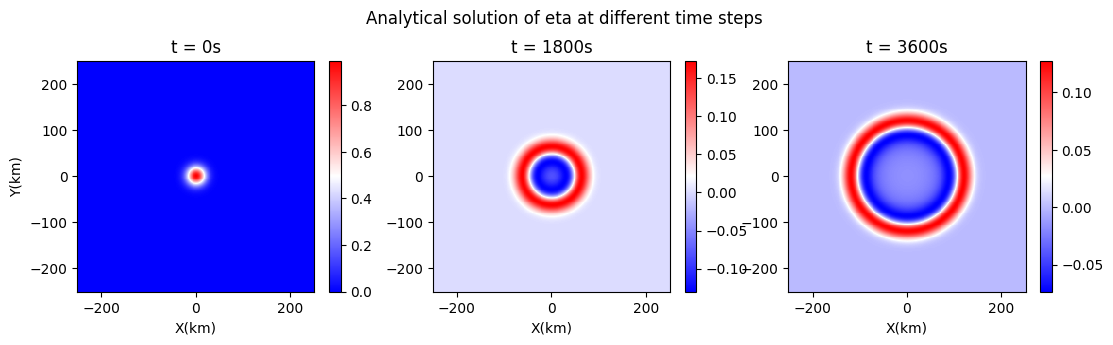

In [32]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, Eta[0], cmap='bwr')
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,3,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, Eta[1], cmap='bwr')
ax2.set_title("t = 1800s")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)
ax3 = fig.add_subplot(1,3,3)
cb3 = ax3.pcolormesh(X/1e3, Y/1e3, Eta[2], cmap='bwr')
ax3.set_title("t = 3600s")
ax3.set_xlabel("X(km)")
fig.colorbar(cb3,ax = ax3)
plt.suptitle('Analytical solution of eta at different time steps',y = 1.05)
plt.show()

In [33]:
########Numerical solution

In [34]:
eta_FD = np.zeros((len(X), len(Y), len(t)))
eta_FD[:, :, 0] = fxy
eta_FD[:, :, 1] = fxy

(251, 251, 3601)

In [35]:
CFL_x = np.sqrt(g*H)*dt/dx
CFL_y = np.sqrt(g*H)*dt/dy

In [39]:
for n in range(1, len(t)-1):
    for i in range(1, len(X)-1):
        for j in range(1, len(Y)-1):
            eta_FD[i,j, n+1] = 2 * eta_FD[i, j, n] - eta_FD[i,j, n-1] + CFL_x**2 * (eta_FD[i+1, j,n] + eta_FD[i-1, j,n] - 2 * eta_FD[i,j, n]) + CFL_y**2 * (eta_FD[i, j+1 ,n] + eta_FD[i, j-1 ,n] - 2 * eta_FD[i, j, n])

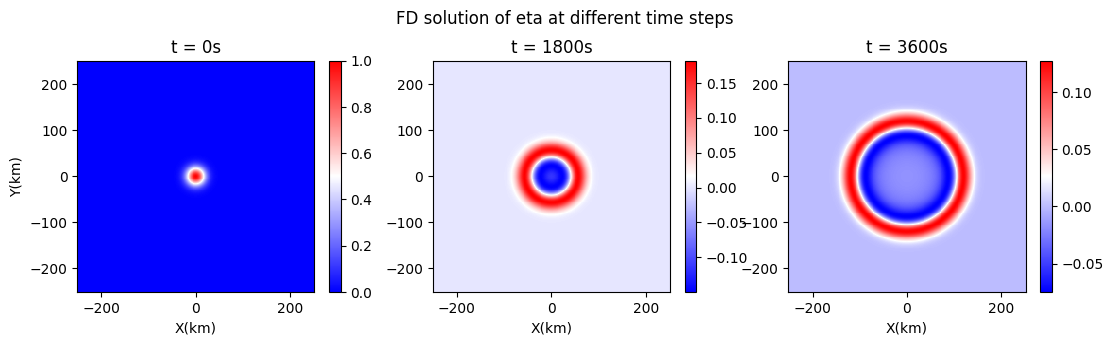

In [43]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,0], cmap='bwr')
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,3,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,1600], cmap='bwr')
ax2.set_title("t = 1800s")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)
ax3 = fig.add_subplot(1,3,3)
cb3 = ax3.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,3600], cmap='bwr')
ax3.set_title("t = 3600s")
ax3.set_xlabel("X(km)")
fig.colorbar(cb3,ax = ax3)
plt.suptitle('FD solution of eta at different time steps',y = 1.05)
plt.show()

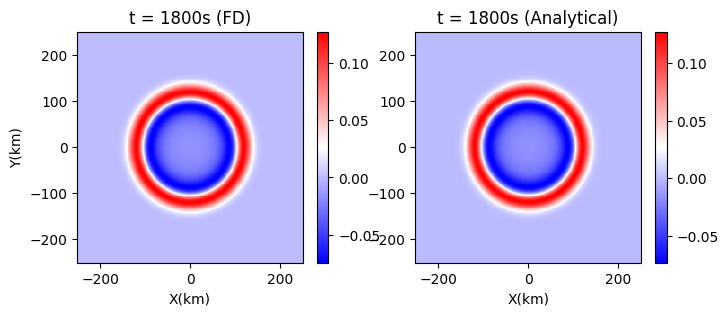

In [47]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(1,2,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,-1], cmap='bwr')
ax1.set_title("t = 1800s (FD)")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,2,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, Eta[2], cmap='bwr')
ax2.set_title("t = 1800s (Analytical)")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)

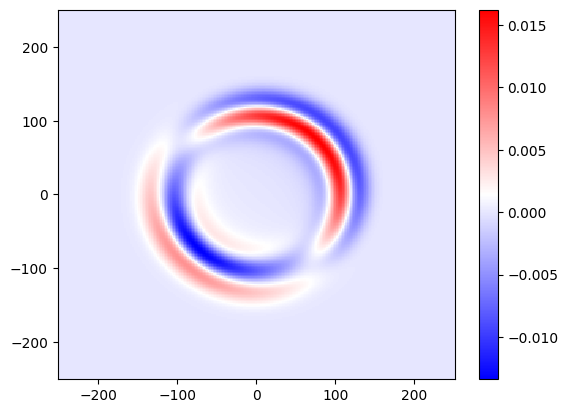

In [51]:

plt.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,-1]-Eta[2], cmap='bwr')
plt.colorbar()